In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error


In [6]:
data=pd.read_csv(r'C:\Users\admin\Downloads\autopriceTree.csv')


In [15]:
data.head()

,fueltype,length,curbweight,horsepower,price
0,gas,168.8,2548,111,13495
1,gas,168.8,2548,111,16500
2,gas,171.2,2823,154,16500
3,gas,176.6,2337,102,13950
4,gas,176.6,2824,115,17450


In [23]:
data.isnull().sum()

fueltype      0
length        0
curbweight    0
horsepower    0
price         0
dtype: int64

In [25]:
data.fueltype=data.fueltype.astype(int)

In [16]:
data.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [21]:
data.fueltype=data.fueltype.replace(['gas', 'diesel'],[0,1])

In [37]:
data.columns

Index(['fueltype', 'length', 'curbweight', 'horsepower', 'price'], dtype='object')

In [39]:
data=data.loc[:,['fueltype', 'length', 'curbweight', 'horsepower', 'price']]

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fueltype    199 non-null    int32  
 1   length      199 non-null    float64
 2   curbweight  199 non-null    int64  
 3   horsepower  199 non-null    int64  
 4   price       199 non-null    int64  
dtypes: float64(1), int32(1), int64(3)
memory usage: 7.1 KB


In [41]:
x=data.loc[:,data.columns!='price']
y=data.loc[:,data.columns=='price']

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state =45)

In [43]:
regr=DecisionTreeRegressor()

In [48]:
regr.fit(x_train,y_train)
yest_train=regr.predict(x_train)

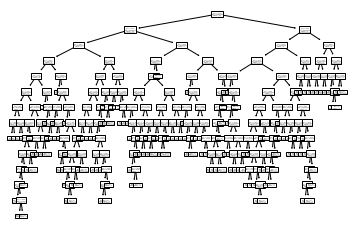

In [47]:
from sklearn import tree
tree.plot_tree(regr.fit(x_train,y_train))
plt.show()

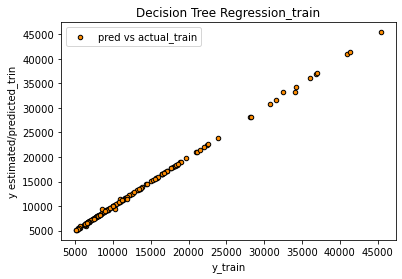

In [49]:
plt.figure()
plt.scatter(y_train,y_pred,s=20,edgecolor='black',c="darkorange",label="pred vs actual_train")
plt.xlabel("y_train")
plt.ylabel("y estimated/predicted_trin")
plt.title("Decision Tree Regression_train")
plt.legend()
plt.show()

In [52]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train,yest_train)
print(mse_train)

21396.270440251574


In [59]:
y_test=y_test.iloc[:,0]

In [60]:
yest_test

array([45400., 19699., 16430.,  8845.,  6692., 23875.,  7898., 14489.,
       16430., 45400.,  7895., 11048., 18420.,  6529., 11199.,  9233.,
       12440., 15040., 28176., 18399.,  8358., 18420.,  6529.,  9258.,
       10795., 16430., 12440.,  8195., 11595., 10698.,  7898., 16500.,
       17950., 15985.,  8358.,  8499., 28248., 10898., 15985., 12764.])

In [62]:
yest_test = regr.predict(x_test)
test_residual = y_test - yest_test

from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(y_test,yest_test)
print(mse_test)


12274077.35


In [66]:
depth=[5,6,7,8,9,10,11]
mse_train,mse_test=[],[]
for i in depth:
    prdctr=DecisionTreeRegressor(max_depth=i)
    prdctr.fit(x_train,y_train)
    y_train_pred=prdctr.predict(x_train)
    y_test_pred=prdctr.predict(x_test)
    
    mse_train.append(mean_squared_error(y_train,y_train_pred))
    mse_test.append(mean_squared_error(y_test,y_test_pred))
    
    

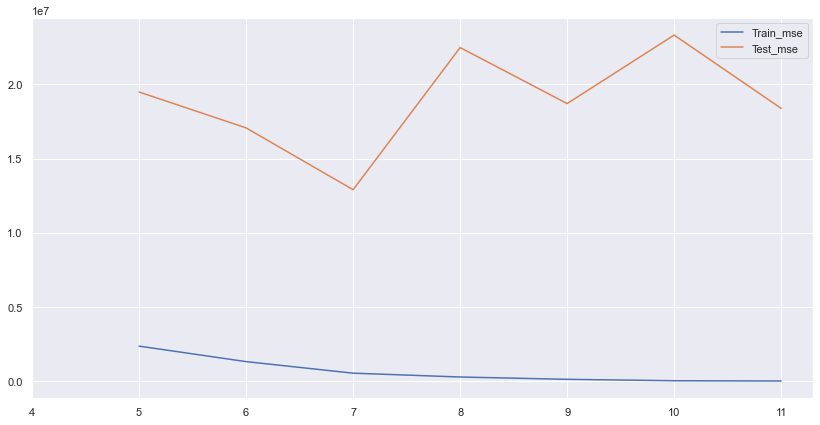

In [67]:
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=mse_train,x=depth,label='Train_mse')
sns.lineplot(y=mse_test,x=depth,label='Test_mse')
plt.xticks(ticks=np.arange(4,12,1))
plt.show()